**Data Description:**
    This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

Source & Acknowledgements:
https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package
    
**Problem Type :**  
    Binary Classification
    
**Target Variable** : Rain Tomorrow [yes/no]    
    
**Algorithm to learn and implement** : Logistic Regression

In [1]:
#importing some of the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#Reading the Data set from CSV file
dataset=pd.read_csv('weatherAUS.csv',sep=',')

In [3]:
#Checking the Dataset size 
dataset.shape

(145460, 23)

In [4]:
# A Glance at the dataset
dataset.head(5)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

Dataset contain Nan values, Date Values needs to be settled and many categorical values

In [5]:
dataset.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [6]:
#Distribution of Target Variable in the dataset
dataset['RainTomorrow'].value_counts()
# we can observe that Yes is very less in number

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [7]:
#changing Y=1 and n=0 here itself to make things better ahead.
def changeyN(x):
    if x=='Yes':
        return 1
    else:
        return 0
    
dataset['RainTomorrow']=dataset['RainTomorrow'].map(changeyN)

**Analysing the Categorical Menioned Columns in the dataset.**


In [8]:
Categorical_columns=list(dataset.select_dtypes(include=["object_"]).columns)
Categorical_columns

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [9]:
dataset[Categorical_columns]

Date Location WindGustDir WindDir9am WindDir3pm RainToday
0       2008-12-01   Albury           W          W        WNW        No
1       2008-12-02   Albury         WNW        NNW        WSW        No
2       2008-12-03   Albury         WSW          W        WSW        No
3       2008-12-04   Albury          NE         SE          E        No
4       2008-12-05   Albury           W        ENE         NW        No
...            ...      ...         ...        ...        ...       ...
145455  2017-06-21    Uluru           E         SE        ENE        No
145456  2017-06-22    Uluru         NNW         SE          N        No
145457  2017-06-23    Uluru           N         SE        WNW        No
145458  2017-06-24    Uluru          SE        SSE          N        No
145459  2017-06-25    Uluru         NaN        ESE        ESE        No

[145460 rows x 6 columns]

In [10]:
dataset.describe(exclude='number')

Date  Location WindGustDir WindDir9am WindDir3pm RainToday
count       145460    145460      135134     134894     141232    142199
unique        3436        49          16         16         16         2
top     2013-11-12  Canberra           W          N         SE        No
freq            49      3436        9915      11758      10838    110319

Summary:

    1. We have sufficient data for analysis and modelling. (But it is highly imbalanced)
    2. From Total Columns we have 6 Categorical Column and 1 Date column.
    3. Rain Today & Rain Tomorrow have binary categorical Values.
    4. Rain Tomorrow is our Target Column.
    5. We do have Null Data present in our Categorical dataset.

In [11]:
#Checking null values in Categorical Columns
dataset[Categorical_columns].isnull().sum()

Date               0
Location           0
WindGustDir    10326
WindDir9am     10566
WindDir3pm      4228
RainToday       3261
dtype: int64

In [12]:
# LEts change date to different columns that makes it easy to process

dataset['Date']=pd.to_datetime(dataset['Date'])
dataset['Day']=dataset['Date'].dt.day
dataset['Month']=dataset['Date'].dt.month
dataset['Year']=dataset['Date'].dt.year

dataset.drop('Date',axis=1,inplace=True)
dataset = dataset[dataset['RainTomorrow'].notna()]

dataset

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
145455    Uluru      2.8     23.4       0.0          NaN       NaN   
145456    Uluru      3.6     25.3       0.0          NaN       NaN   
145457    Uluru      5.4     26.9       0.0          NaN       NaN   
145458    Uluru      7.8     27.0       0.0          NaN       NaN   
145459    Uluru     14.9      NaN       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  \
0                W           44.0          W        WNW  ...       1007.1   
1              WNW           44.0        NNW        WSW  ...       1007.8   
2              WSW           46.0          W        WSW  ...       1008.7   
3               NE           24.0         SE          E  ...       1012.8   
4                W           41.0        ENE         NW  ...       1006.0   
...            ...            ...        ...        ...  ...          ...   
145455           E           31.0         SE        ENE  ...       1020.3   
145456         NNW           22.0         SE          N  ...       1019.1   
145457           N           37.0         SE        WNW  ...       1016.8   
145458          SE           28.0        SSE          N  ...       1016.5   
145459         NaN            NaN        ESE        ESE  ...       1017.9   

        Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Day  \
0            8.0       NaN     16.9     21.8         No             0    1   
1            NaN       NaN     17.2     24.3         No             0    2   
2            NaN       2.0     21.0     23.2         No             0    3   
3            NaN       NaN     18.1     26.5         No             0    4   
4            7.0       8.0     17.8     29.7         No             0    5   
...          ...       ...      ...      ...        ...           ...  ...   
145455       NaN       NaN     10.1     22.4         No             0   21   
145456       NaN       NaN     10.9     24.5         No             0   22   
145457       NaN       NaN     12.5     26.1         No             0   23   
145458       3.0       2.0     15.1     26.0         No             0   24   
145459       8.0       8.0     15.0     20.9         No             0   25   

        Month  Year  
0          12  2008  
1          12  2008  
2          12  2008  
3          12  2008  
4          12  2008  
...       ...   ...  
145455      6  2017  
145456      6  2017  
145457      6  2017  
145458      6  2017  
145459      6  2017  

[145460 rows x 25 columns]

**Analyzing Numerical Variables**

In [13]:
#checking distribution
dataset.describe().T

count         mean        std     min     25%     50%  \
MinTemp        143975.0    12.194034   6.398495    -8.5     7.6    12.0   
MaxTemp        144199.0    23.221348   7.119049    -4.8    17.9    22.6   
Rainfall       142199.0     2.360918   8.478060     0.0     0.0     0.0   
Evaporation     82670.0     5.468232   4.193704     0.0     2.6     4.8   
Sunshine        75625.0     7.611178   3.785483     0.0     4.8     8.4   
WindGustSpeed  135197.0    40.035230  13.607062     6.0    31.0    39.0   
WindSpeed9am   143693.0    14.043426   8.915375     0.0     7.0    13.0   
WindSpeed3pm   142398.0    18.662657   8.809800     0.0    13.0    19.0   
Humidity9am    142806.0    68.880831  19.029164     0.0    57.0    70.0   
Humidity3pm    140953.0    51.539116  20.795902     0.0    37.0    52.0   
Pressure9am    130395.0  1017.649940   7.106530   980.5  1012.9  1017.6   
Pressure3pm    130432.0  1015.255889   7.037414   977.1  1010.4  1015.2   
Cloud9am        89572.0     4.447461   2.887159     0.0     1.0     5.0   
Cloud3pm        86102.0     4.509930   2.720357     0.0     2.0     5.0   
Temp9am        143693.0    16.990631   6.488753    -7.2    12.3    16.7   
Temp3pm        141851.0    21.683390   6.936650    -5.4    16.6    21.1   
RainTomorrow   145460.0     0.219146   0.413669     0.0     0.0     0.0   
Day            145460.0    15.712258   8.794789     1.0     8.0    16.0   
Month          145460.0     6.399615   3.427262     1.0     3.0     6.0   
Year           145460.0  2012.769751   2.537684  2007.0  2011.0  2013.0   

                  75%     max  
MinTemp          16.9    33.9  
MaxTemp          28.2    48.1  
Rainfall          0.8   371.0  
Evaporation       7.4   145.0  
Sunshine         10.6    14.5  
WindGustSpeed    48.0   135.0  
WindSpeed9am     19.0   130.0  
WindSpeed3pm     24.0    87.0  
Humidity9am      83.0   100.0  
Humidity3pm      66.0   100.0  
Pressure9am    1022.4  1041.0  
Pressure3pm    1020.0  1039.6  
Cloud9am          7.0     9.0  
Cloud3pm          7.0     9.0  
Temp9am          21.6    40.2  
Temp3pm          26.4    46.7  
RainTomorrow      0.0     1.0  
Day              23.0    31.0  
Month             9.0    12.0  
Year           2015.0  2017.0

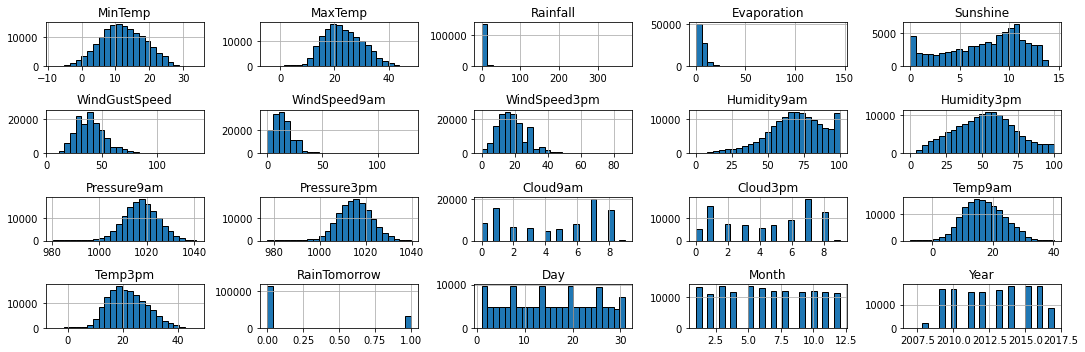

In [14]:
dataset.hist(bins=25, figsize=(15, 5), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

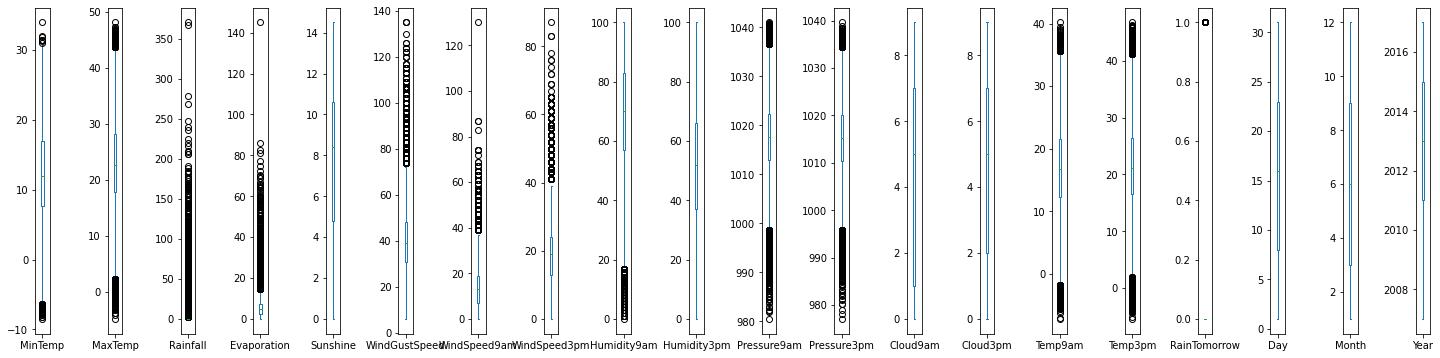

In [15]:
dataset.plot(kind='box', subplots=True, sharey=False, figsize=(25, 6))
# increase spacing between subplots
plt.subplots_adjust(wspace=4) 
plt.show()

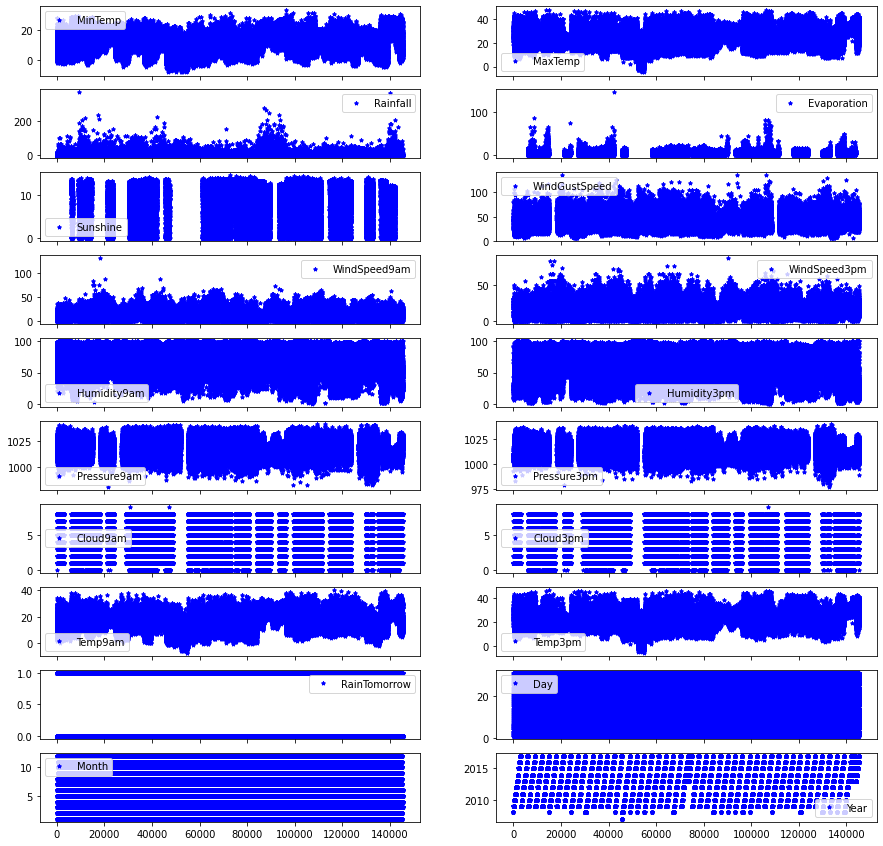

In [16]:
dataset.plot(lw=0, color= 'Blue',marker="*",markersize=4, subplots=True, layout=(-1, 2), figsize=(15, 15));


**Most of the Data seems to be skewed and have a high presence of outliers in the data which will be udpdated in later sections**

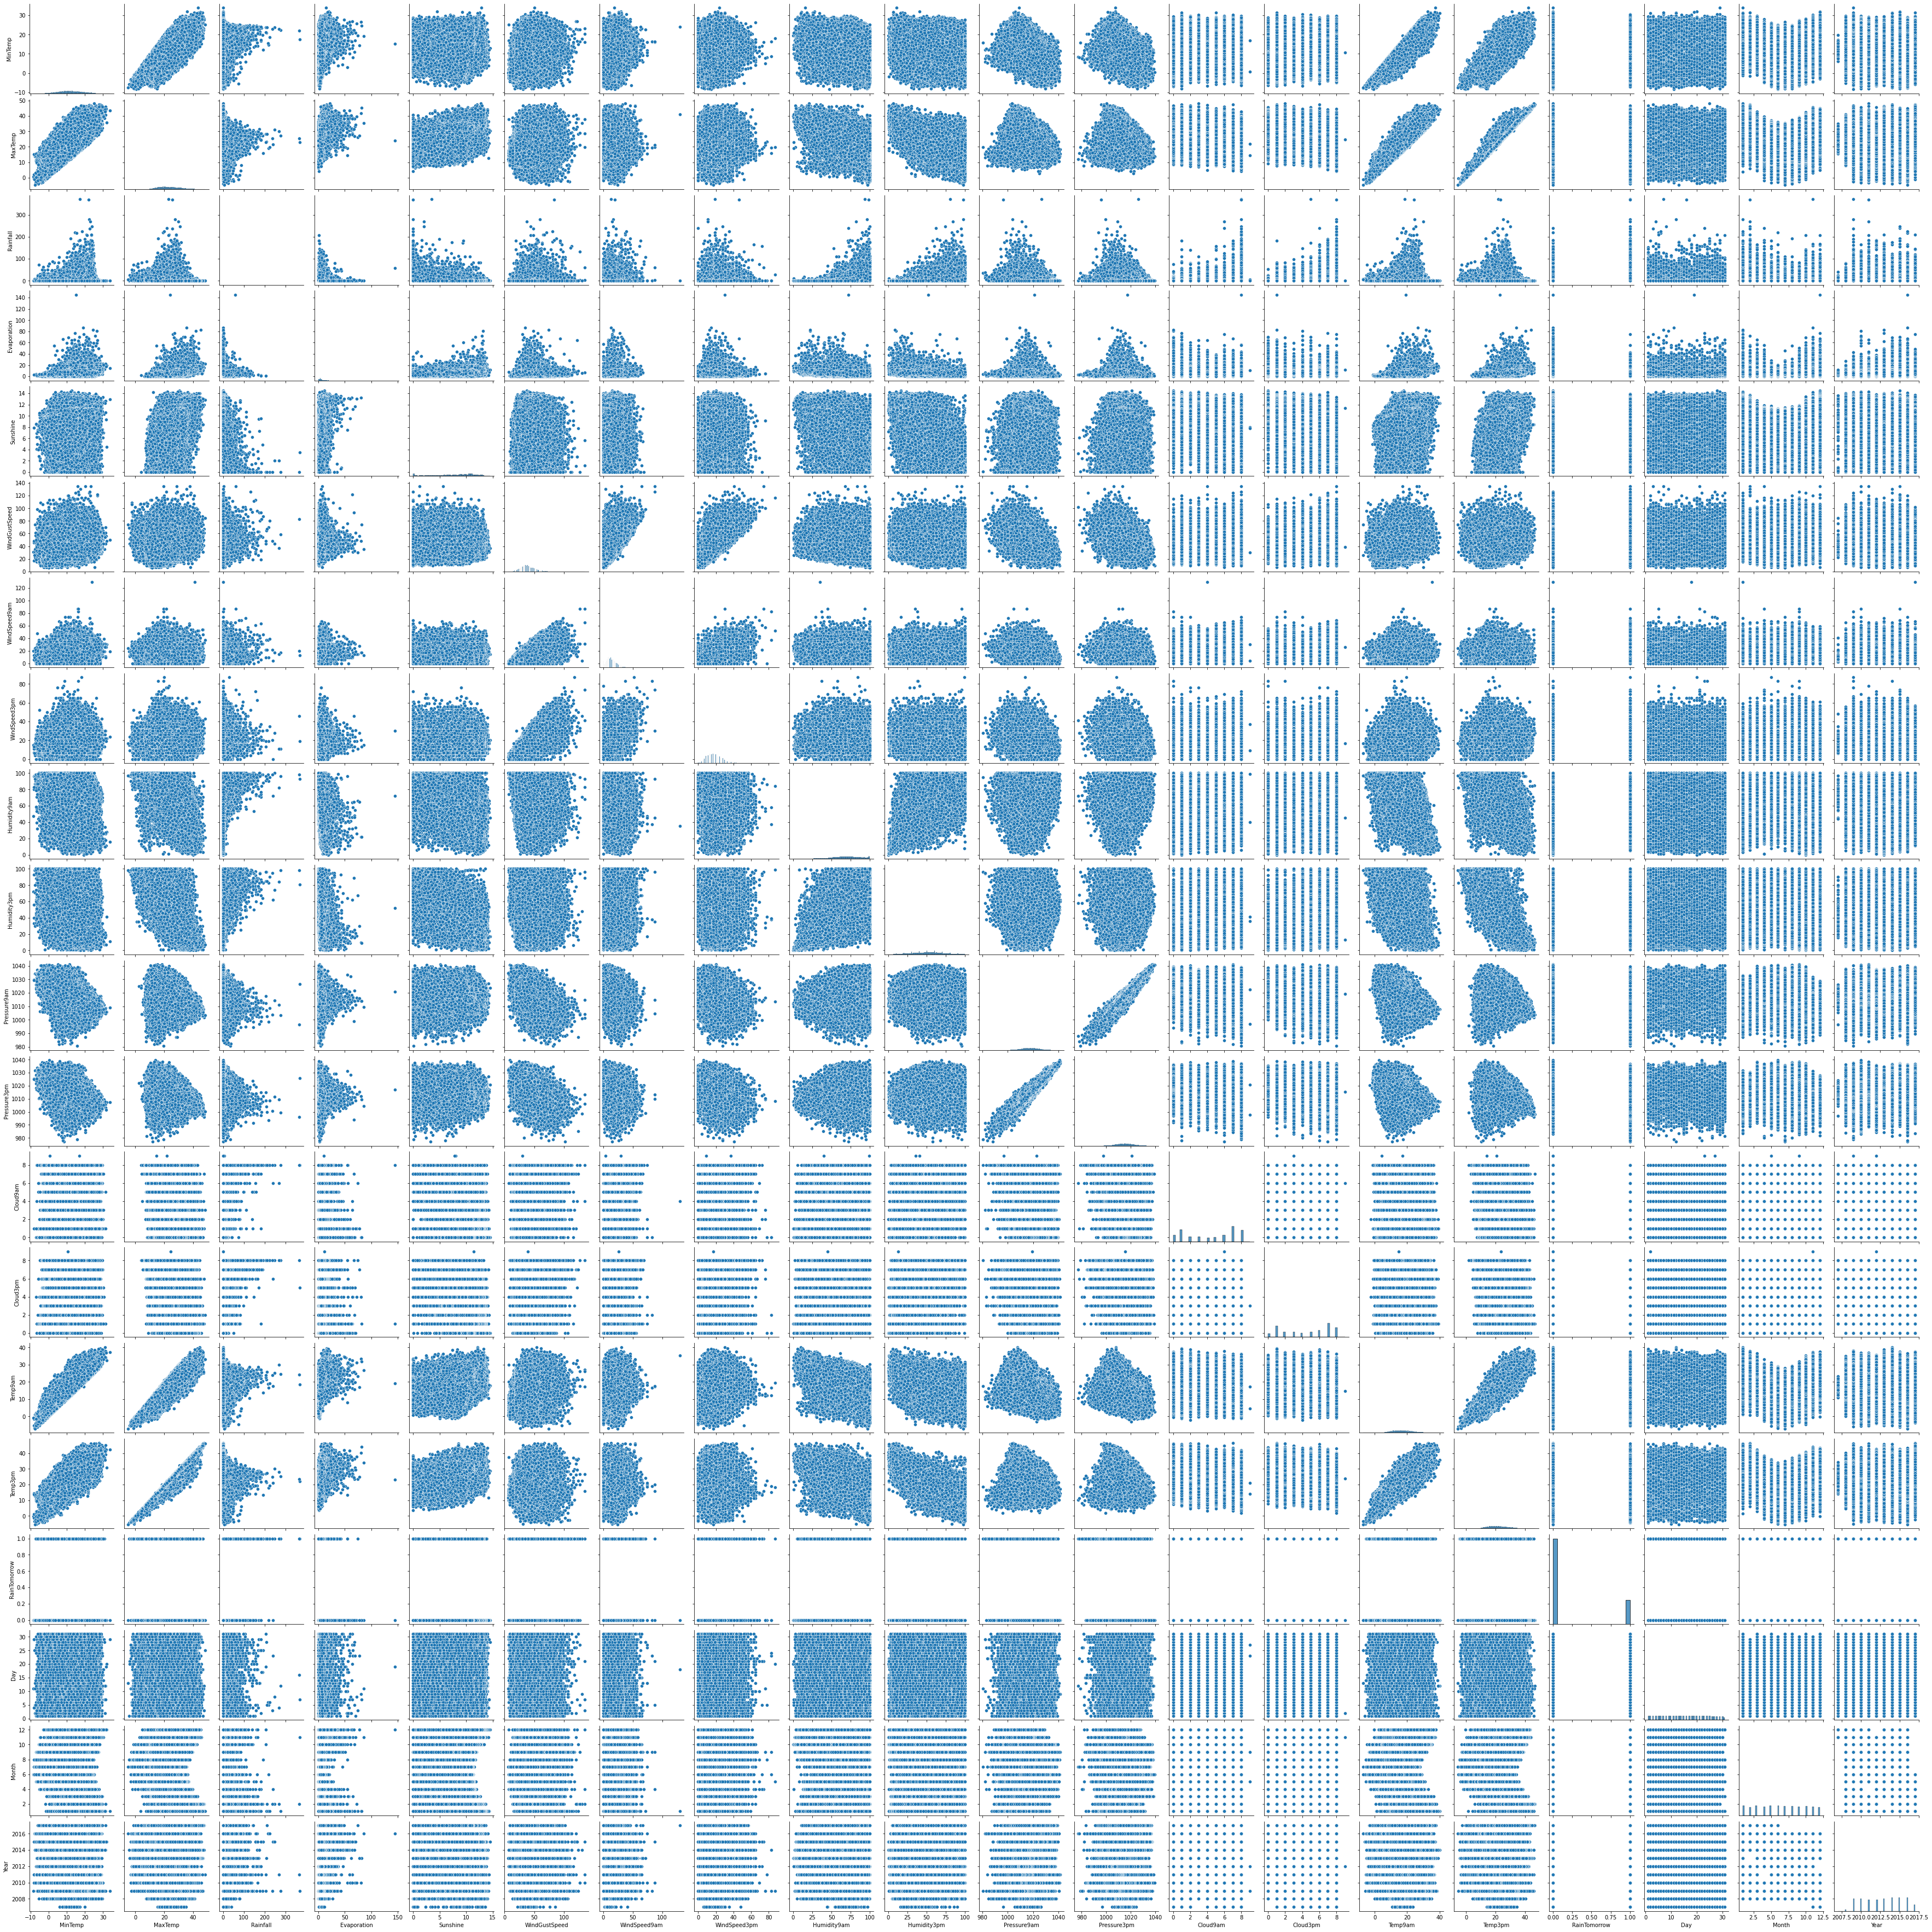

In [17]:
sns.pairplot(data = dataset, vars=list(dataset.select_dtypes(include=["number"]).columns))
plt.show()

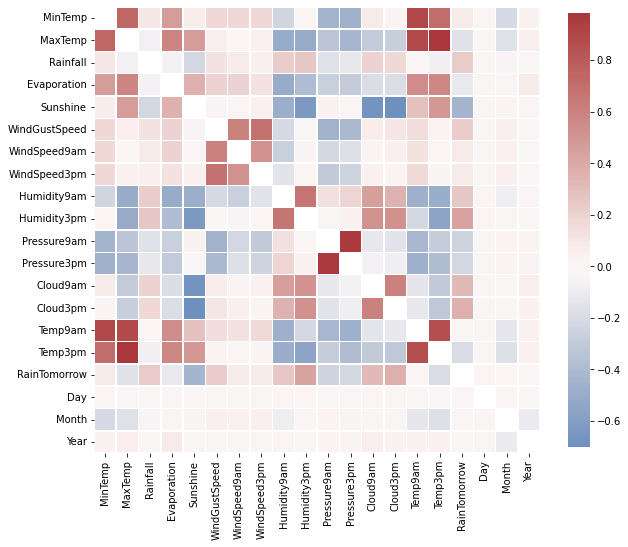

In [18]:
plt.figure(figsize=(10, 10))
data_corr = dataset[list(dataset.select_dtypes(include=["number"]).columns)].corr(method="pearson")

sns.heatmap(data_corr, mask=np.eye(len(data_corr)), square=True,
            center=0, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [19]:
#Dropping highly correlated Values in the DATASET
dataset=dataset.drop(["Temp9am","Pressure9am","Temp3pm"],axis=1)

In [20]:
data_corr = dataset[list(dataset.select_dtypes(include=["number"]).columns)].corr(method="pearson")

data_corr[data_corr>0.7]

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736555       NaN          NaN       NaN   
MaxTemp        0.736555  1.000000       NaN          NaN       NaN   
Rainfall            NaN       NaN       1.0          NaN       NaN   
Evaporation         NaN       NaN       NaN          1.0       NaN   
Sunshine            NaN       NaN       NaN          NaN       1.0   
WindGustSpeed       NaN       NaN       NaN          NaN       NaN   
WindSpeed9am        NaN       NaN       NaN          NaN       NaN   
WindSpeed3pm        NaN       NaN       NaN          NaN       NaN   
Humidity9am         NaN       NaN       NaN          NaN       NaN   
Humidity3pm         NaN       NaN       NaN          NaN       NaN   
Pressure3pm         NaN       NaN       NaN          NaN       NaN   
Cloud9am            NaN       NaN       NaN          NaN       NaN   
Cloud3pm            NaN       NaN       NaN          NaN       NaN   
RainTomorrow        NaN       NaN       NaN          NaN       NaN   
Day                 NaN       NaN       NaN          NaN       NaN   
Month               NaN       NaN       NaN          NaN       NaN   
Year                NaN       NaN       NaN          NaN       NaN   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp                  NaN           NaN           NaN          NaN   
MaxTemp                  NaN           NaN           NaN          NaN   
Rainfall                 NaN           NaN           NaN          NaN   
Evaporation              NaN           NaN           NaN          NaN   
Sunshine                 NaN           NaN           NaN          NaN   
WindGustSpeed            1.0           NaN           NaN          NaN   
WindSpeed9am             NaN           1.0           NaN          NaN   
WindSpeed3pm             NaN           NaN           1.0          NaN   
Humidity9am              NaN           NaN           NaN          1.0   
Humidity3pm              NaN           NaN           NaN          NaN   
Pressure3pm              NaN           NaN           NaN          NaN   
Cloud9am                 NaN           NaN           NaN          NaN   
Cloud3pm                 NaN           NaN           NaN          NaN   
RainTomorrow             NaN           NaN           NaN          NaN   
Day                      NaN           NaN           NaN          NaN   
Month                    NaN           NaN           NaN          NaN   
Year                     NaN           NaN           NaN          NaN   

               Humidity3pm  Pressure3pm  Cloud9am  Cloud3pm  RainTomorrow  \
MinTemp                NaN          NaN       NaN       NaN           NaN   
MaxTemp                NaN          NaN       NaN       NaN           NaN   
Rainfall               NaN          NaN       NaN       NaN           NaN   
Evaporation            NaN          NaN       NaN       NaN           NaN   
Sunshine               NaN          NaN       NaN       NaN           NaN   
WindGustSpeed          NaN          NaN       NaN       NaN           NaN   
WindSpeed9am           NaN          NaN       NaN       NaN           NaN   
WindSpeed3pm           NaN          NaN       NaN       NaN           NaN   
Humidity9am            NaN          NaN       NaN       NaN           NaN   
Humidity3pm            1.0          NaN       NaN       NaN           NaN   
Pressure3pm            NaN          1.0       NaN       NaN           NaN   
Cloud9am               NaN          NaN       1.0       NaN           NaN   
Cloud3pm               NaN          NaN       NaN       1.0           NaN   
RainTomorrow           NaN          NaN       NaN       NaN           1.0   
Day                    NaN          NaN       NaN       NaN           NaN   
Month                  NaN          NaN       NaN       NaN           NaN   
Year                   NaN          NaN       NaN       NaN           NaN   

               Day  Month  Year  
MinTemp        NaN 

Checking Distribution of Categorical Variables one by one

In [21]:
dataset[dataset.select_dtypes(include=["object_"]).columns].isnull().sum()

Location           0
WindGustDir    10326
WindDir9am     10566
WindDir3pm      4228
RainToday       3261
dtype: int64

In [22]:
#location variable have High carinality as it contains many unique values
list(dataset['Location'].unique())

['Albury',
 'BadgerysCreek',
 'Cobar',
 'CoffsHarbour',
 'Moree',
 'Newcastle',
 'NorahHead',
 'NorfolkIsland',
 'Penrith',
 'Richmond',
 'Sydney',
 'SydneyAirport',
 'WaggaWagga',
 'Williamtown',
 'Wollongong',
 'Canberra',
 'Tuggeranong',
 'MountGinini',
 'Ballarat',
 'Bendigo',
 'Sale',
 'MelbourneAirport',
 'Melbourne',
 'Mildura',
 'Nhil',
 'Portland',
 'Watsonia',
 'Dartmoor',
 'Brisbane',
 'Cairns',
 'GoldCoast',
 'Townsville',
 'Adelaide',
 'MountGambier',
 'Nuriootpa',
 'Woomera',
 'Albany',
 'Witchcliffe',
 'PearceRAAF',
 'PerthAirport',
 'Perth',
 'SalmonGums',
 'Walpole',
 'Hobart',
 'Launceston',
 'AliceSprings',
 'Darwin',
 'Katherine',
 'Uluru']

In [23]:
#record seems to be equally distributed from most of the places
dataset.Location.value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


In [24]:
pd.get_dummies(dataset['Location'],drop_first=True,dummy_na=True).head()

Albany  Albury  AliceSprings  BadgerysCreek  Ballarat  Bendigo  Brisbane  \
0       0       1             0              0         0        0         0   
1       0       1             0              0         0        0         0   
2       0       1             0              0         0        0         0   
3       0       1             0              0         0        0         0   
4       0       1             0              0         0        0         0   

   Cairns  Canberra  Cobar  ...  Tuggeranong  Uluru  WaggaWagga  Walpole  \
0       0         0      0  ...            0      0           0        0   
1       0         0      0  ...            0      0           0        0   
2       0         0      0  ...            0      0           0        0   
3       0         0      0  ...            0      0           0        0   
4       0         0      0  ...            0      0           0        0   

   Watsonia  Williamtown  Witchcliffe  Wollongong  Woomera  NaN  
0         0            0            0           0        0    0  
1         0            0            0           0        0    0  
2         0            0            0           0        0    0  
3         0            0            0           0        0    0  
4         0            0            0           0        0    0  

[5 rows x 49 columns]

In [25]:

dataset[dataset.select_dtypes(include=["object_"]).columns].isnull().sum()

Location           0
WindGustDir    10326
WindDir9am     10566
WindDir3pm      4228
RainToday       3261
dtype: int64

In [26]:
#checking other variable WindGustDir
dataset['WindGustDir'].value_counts()


W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

In [27]:
pd.get_dummies(dataset['WindGustDir'],drop_first=True,dummy_na=True).head()

ENE  ESE  N  NE  NNE  NNW  NW  S  SE  SSE  SSW  SW  W  WNW  WSW  NaN
0    0    0  0   0    0    0   0  0   0    0    0   0  1    0    0    0
1    0    0  0   0    0    0   0  0   0    0    0   0  0    1    0    0
2    0    0  0   0    0    0   0  0   0    0    0   0  0    0    1    0
3    0    0  0   1    0    0   0  0   0    0    0   0  0    0    0    0
4    0    0  0   0    0    0   0  0   0    0    0   0  1    0    0    0

In [28]:
dataset['WindDir9am'].value_counts()



N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

In [29]:


pd.get_dummies(dataset['WindDir9am'],drop_first=True,dummy_na=True).head()

ENE  ESE  N  NE  NNE  NNW  NW  S  SE  SSE  SSW  SW  W  WNW  WSW  NaN
0    0    0  0   0    0    0   0  0   0    0    0   0  1    0    0    0
1    0    0  0   0    0    1   0  0   0    0    0   0  0    0    0    0
2    0    0  0   0    0    0   0  0   0    0    0   0  1    0    0    0
3    0    0  0   0    0    0   0  0   1    0    0   0  0    0    0    0
4    1    0  0   0    0    0   0  0   0    0    0   0  0    0    0    0

In [30]:
dataset['WindDir3pm'].value_counts()


SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

In [31]:
pd.get_dummies(dataset['WindDir3pm'],drop_first=True,dummy_na=True).head()

ENE  ESE  N  NE  NNE  NNW  NW  S  SE  SSE  SSW  SW  W  WNW  WSW  NaN
0    0    0  0   0    0    0   0  0   0    0    0   0  0    1    0    0
1    0    0  0   0    0    0   0  0   0    0    0   0  0    0    1    0
2    0    0  0   0    0    0   0  0   0    0    0   0  0    0    1    0
3    0    0  0   0    0    0   0  0   0    0    0   0  0    0    0    0
4    0    0  0   0    0    0   1  0   0    0    0   0  0    0    0    0

In [32]:
dataset['RainToday'].value_counts()


No     110319
Yes     31880
Name: RainToday, dtype: int64

In [33]:
pd.get_dummies(dataset['RainToday'],drop_first=True,dummy_na=True).head()

Yes  NaN
0    0    0
1    0    0
2    0    0
3    0    0
4    0    0

In [34]:
# Starting Replacing NAN values in Categorical DATA USING MODE 
for columns in dataset.columns:
    percentage_n=(dataset[columns].isnull().sum()/len(dataset[columns]))*100
    if percentage_n>0:
        print(columns,percentage_n)

MinTemp 1.0208992162793895
MaxTemp 0.8669049910628353
Rainfall 2.2418534304963567
Evaporation 43.166506256015396
Sunshine 48.00976213391998
WindGustDir 7.098858792795271
WindGustSpeed 7.055547916953114
WindDir9am 7.263852605527293
WindDir3pm 2.906641000962464
WindSpeed9am 1.214766946239516
WindSpeed3pm 2.105046060772721
Humidity9am 1.8245565791282825
Humidity3pm 3.09844630826344
Pressure3pm 10.331362573903478
Cloud9am 38.42155919153032
Cloud3pm 40.80709473394747
RainToday 2.2418534304963567


Issues identified in the dataset:

    1. Null Variables present
    2. Data needs to scaled before analysis
    3. presence of outliers
    
Splitting the dataset before performing any operations on it    
    

In [35]:
# Splitting the data before perforing analysis
from sklearn.model_selection import train_test_split

In [36]:
y=dataset['RainTomorrow']
X=dataset.drop('RainTomorrow',axis=1)

In [37]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [38]:
x_train.shape,y_train.shape

((101822, 21), (101822,))

In [39]:
y_train.value_counts()

0    79508
1    22314
Name: RainTomorrow, dtype: int64

In [40]:
CAT_COLS=list(x_train.select_dtypes(include='object_').columns)
NUM_COLS=list(x_train.select_dtypes(include='number').columns)

In [41]:
#imputing missing Values in Numerical data
x_test[NUM_COLS].isnull().sum()
#since we dont want to change the distribution we will impute by Median.



MinTemp            417
MaxTemp            347
Rainfall           954
Evaporation      18962
Sunshine         21023
WindGustSpeed     3023
WindSpeed9am       509
WindSpeed3pm       875
Humidity9am        765
Humidity3pm       1318
Pressure3pm       4443
Cloud9am         16816
Cloud3pm         17805
Day                  0
Month                0
Year                 0
dtype: int64

In [42]:

for dfa in [x_train,x_test]:
    for col in NUM_COLS:
        dfa_col_median=dfa[col].median()
        dfa[col].fillna(dfa_col_median,inplace=True)

In [43]:
for dfa in [x_train,x_test]:
    for col in CAT_COLS:
        NullPER=(dfa[col].isnull().sum()/len(dfa))*100
        print(col,NullPER)
        

Location 0.0
WindGustDir 7.157588733279645
WindDir9am 7.3127614857299985
WindDir3pm 2.935514918190568
RainToday 2.2657186069808097
Location 0.0
WindGustDir 6.961822264998396
WindDir9am 7.14973188505431
WindDir3pm 2.8392685274302214
RainToday 2.186168018699299


In [44]:
#imputing the Categorical Columns with Mode to avoid any change in distribution
for dfa in [x_train,x_test]:
    for col in CAT_COLS:
        dfa_col_mode=dfa[col].mode()[0]
        dfa[col].fillna(dfa_col_mode,inplace=True)

In [45]:
for dfa in [x_train,x_test]:
    for col in CAT_COLS:
        NullPER=(dfa[col].isnull().sum()/len(dfa))*100
        print(col,NullPER)
        

Location 0.0
WindGustDir 0.0
WindDir9am 0.0
WindDir3pm 0.0
RainToday 0.0
Location 0.0
WindGustDir 0.0
WindDir9am 0.0
WindDir3pm 0.0
RainToday 0.0


In [46]:
import category_encoders as ce
#Categorically encoding the categorical variable in data
cat=ce.BinaryEncoder(cols=['RainToday'])
x_train=cat.fit_transform(x_train)
x_test=cat.fit_transform(x_test)


In [47]:
x_train=x_train

In [48]:
x_test = pd.concat([x_test[NUM_COLS], x_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(x_test.Location,prefix='Location'), 
                     pd.get_dummies(x_test.WindGustDir,prefix='WindGustDir'),
                     pd.get_dummies(x_test.WindDir9am,prefix='WindDir9am'),
                     pd.get_dummies(x_test.WindDir3pm,prefix='WindDir3pm')], axis=1)
x_train = pd.concat([x_train[NUM_COLS], x_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(x_train.Location,prefix='Location'), 
                     pd.get_dummies(x_train.WindGustDir,prefix='WindGustDir'),
                     pd.get_dummies(x_train.WindDir9am,prefix='WindDir9am'),
                     pd.get_dummies(x_train.WindDir3pm,prefix='WindDir3pm')], axis=1)

In [49]:
x_train.shape,y_train.shape

((101822, 115), (101822,))

In [50]:
x_train.describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  101822.000000  101822.000000  101822.000000  101822.000000   
mean       12.190462      23.207650       2.275706       5.186821   
std         6.371510       7.096827       8.225671       3.207244   
min        -8.500000      -4.800000       0.000000       0.000000   
25%         7.600000      17.925000       0.000000       4.000000   
50%        12.000000      22.600000       0.000000       4.800000   
75%        16.800000      28.200000       0.600000       5.400000   
max        31.900000      48.100000     278.400000     145.000000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  101822.000000  101822.000000  101822.000000  101822.000000   
mean        7.987846      39.982135      14.045491      18.691167   
std         2.759839      13.121415       8.877283       8.710320   
min         0.000000       6.000000       0.000000       0.000000   
25%         8.200000      31.000000       7.000000      13.000000   
50%         8.400000      39.000000      13.000000      19.000000   
75%         8.700000      46.000000      19.000000      24.000000   
max        14.500000     135.000000     130.000000      83.000000   

         Humidity9am    Humidity3pm  ...  WindDir3pm_NNW  WindDir3pm_NW  \
count  101822.000000  101822.000000  ...   101822.000000  101822.000000   
mean       68.923445      51.566076  ...        0.054369       0.059368   
std        18.843146      20.431224  ...        0.226746       0.236314   
min         1.000000       0.000000  ...        0.000000       0.000000   
25%        57.000000      37.000000  ...        0.000000       0.000000   
50%        70.000000      52.000000  ...        0.000000       0.000000   
75%        83.000000      65.000000  ...        0.000000       0.000000   
max       100.000000     100.000000  ...        1.000000       1.000000   

        WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  \
count  101822.000000  101822.000000   101822.000000   101822.000000   
mean        0.068227       0.104201        0.065251        0.055823   
std         0.252136       0.305523        0.246970        0.229581   
min         0.000000       0.000000        0.000000        0.000000   
25%         0.000000       0.000000        0.000000        0.000000   
50%         0.000000       0.000000        0.000000        0.000000   
75%         0.000000       0.000000        0.000000        0.000000   
max         1.000000       1.000000        1.000000        1.000000   

       WindDir3pm_SW   WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  
count  101822.000000  101822.000000   101822.000000   101822.000000  
mean        0.063945       0.069317        0.060724        0.065389  
std         0.244656       0.253994        0.238824        0.247212  
min         0.000000       0.000000        0.000000        0.000000  
25%         0.000000       0.000000        0.000000        0.000000  
50%         0.000000       0.000000        0.000000        0.000000  
75%         0.000000       0.000000        0.000000        0.000000  
max         1.000000       1.000000        1.000000        1.000000  

[8 rows x 115 columns]

In [51]:
#upper capping the outliers with max value
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [x_train, x_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [52]:
#Scaling the dataset for better results
from sklearn.preprocessing import MinMaxScaler
cols_x = x_train.columns
cols_y=x_test.columns
scaler = MinMaxScaler()



x_train[list(cols_x)] = scaler.fit_transform(x_train[list(cols_x)])

x_test[list(cols_y)] = scaler.transform(x_test[list(cols_y)])


In [53]:
x_train[list(cols_x)] = scaler.fit_transform(x_train[list(cols_x)])


In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
# Fitting a Logistic Regression Model
logreg=LogisticRegression(solver='liblinear',random_state=0)


In [56]:
logreg.fit(x_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [57]:
y_pred_test = logreg.predict(x_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
logreg.predict_proba(x_test)[:,0]

array([0.99181919, 0.62604392, 0.59697289, ..., 0.98982025, 0.83285605,
       0.92604262])

In [59]:
logreg.predict_proba(x_test)[:,1]

array([0.00818081, 0.37395608, 0.40302711, ..., 0.01017975, 0.16714395,
       0.07395738])

Evaluating the Model Built

In [60]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [61]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))


#accuracy is high, since data is highly imbalanced precision and recall are low

Model accuracy score: 0.8483


In [62]:
#there seems to be no bias and variance in our dataset
print('Training set score: {:.4f}'.format(logreg.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(x_test, y_test)))

Training set score: 0.8471
Test set score: 0.8483


In [63]:
# instantiate the model with penalty and check the score
logreg100 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(x_train, y_train)

print('Training set score: {:.4f}'.format(logreg100.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(x_test, y_test)))

Training set score: 0.8422
Test set score: 0.8428


In [64]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[32288  1787]
 [ 4832  4731]]

True Positives(TP) =  32288

True Negatives(TN) =  4731

False Positives(FP) =  1787

False Negatives(FN) =  4832


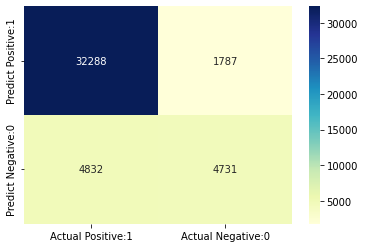

In [65]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [66]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     34075
           1       0.73      0.49      0.59      9563

    accuracy                           0.85     43638
   macro avg       0.80      0.72      0.75     43638
weighted avg       0.84      0.85      0.84     43638



In [67]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))



# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))



recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Classification accuracy : 0.8483
Classification error : 0.1517
Precision : 0.9476
Recall or Sensitivity : 0.8698


In [68]:
y_pred_prob = logreg.predict_proba(x_test)[0:10]

y_pred_prob

array([[0.99181919, 0.00818081],
       [0.62604392, 0.37395608],
       [0.59697289, 0.40302711],
       [0.7592039 , 0.2407961 ],
       [0.87442613, 0.12557387],
       [0.98617486, 0.01382514],
       [0.93644496, 0.06355504],
       [0.8829763 , 0.1170237 ],
       [0.68377421, 0.31622579],
       [0.30742901, 0.69257099]])

In [69]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

y_pred_prob_df


Prob of - No rain tomorrow (0)  Prob of - Rain tomorrow (1)
0                        0.991819                     0.008181
1                        0.626044                     0.373956
2                        0.596973                     0.403027
3                        0.759204                     0.240796
4                        0.874426                     0.125574
5                        0.986175                     0.013825
6                        0.936445                     0.063555
7                        0.882976                     0.117024
8                        0.683774                     0.316226
9                        0.307429                     0.692571

In [70]:

# print the first 10 predicted probabilities for class 1 - Probability of rain

logreg.predict_proba(x_test)[0:10, 1]

array([0.00818081, 0.37395608, 0.40302711, 0.2407961 , 0.12557387,
       0.01382514, 0.06355504, 0.1170237 , 0.31622579, 0.69257099])

In [71]:
y_pred1 = logreg.predict_proba(x_test)[:, 1]

Text(0, 0.5, 'Frequency')

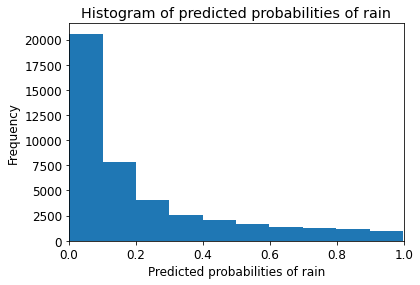

In [72]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

DUE TO IMBALANCED DATASET AND HAVING THE DEFAULT THRESHOLD WE SEE SOME ERROR IN THE RESULTS,
RESETTING THE THRESOLD CAN HELP US TO HAVE MORE ACCURACY IN THE MODEL


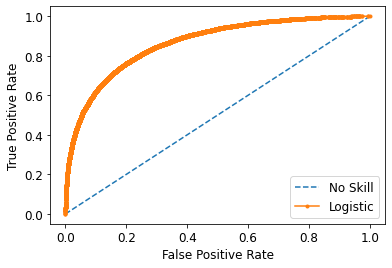

In [73]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot

yhat = logreg.predict_proba(x_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [74]:
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


Best Threshold=0.222599, G-Mean=0.781


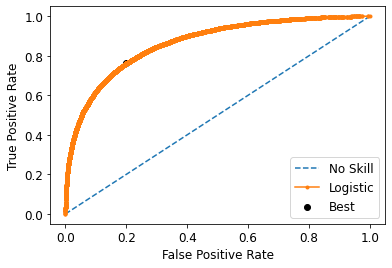

In [75]:
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()


CHECKING IF CROSS VALIDATION HELPS US TO INCREASE ACCURACY

In [76]:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, x_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.84306408 0.84645225 0.84968572 0.84565901 0.84747594]


In [77]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8465


PERFORMIN GRID SEARCH FOR FINDING THE BEST PENALTY AND PENALTY VALUE

In [79]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)


grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy', verbose=1)

In [80]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8466


Parameters that give the best results : 

 {'C': 1000}


Estimator that was chosen by the search : 

 LogisticRegression(C=1000, random_state=0, solver='liblinear')


In [81]:
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(x_test, y_test)))

GridSearch CV score on test set: 0.8482


some important colnclusions:

    1. We dont see any signs of overfitting or underfitting of the model
    2. Data is highly imbaalanced
    3. we got an accuracy score of almost 85% that is a very good score at initial stages, we will learn and apply more concepts to increase this score.
    4. We see more complex model gives better accuracy.
    5. Grid search and CV doesnt helps us much to increase model accuracy in this case.
    6. ROC-AUC score is more deviated toward 1 that tell us model is a goood classifier (can be improved though)
    7. increasing the threshold will definetely help us increase the accuracy

THANKS! THIS NOTEBOOK IS A PART OF MY SELF LEARNING AND WILL UPDATE THIS NOTEBOOK AS I GET MORE INSGHTS ON HANDLING IMBALANCED DATA 